In [721]:
import pandas as pd
import seaborn as sns
import re
import os

# standard count of files in the folder. 
def count_files_in_directory(directory_path):
    try:
        # List all the files and directories in the given directory
        items = os.listdir(directory_path)
        
        # Filter out directories, keeping only files
        files = [item for item in items if os.path.isfile(os.path.join(directory_path, item))]
        
        # Return the number of files
        return len(files)
    
    except FileNotFoundError:
        return "Directory not found"
    except Exception as e:
        return f"An error occurred: {e}"

# using the function
directory_path = 'C:/stats_research/data_llm-for-cpu/stats'
file_count = count_files_in_directory(directory_path)

#-----------------------------------------------------------

# Dictionary to hold the data
data = {}


for i in range(1, file_count + 1):
    file_path = f'C:/stats_research/data_llm-for-cpu/stats/stats_00{i}.txt'
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Grabbing keys to use in the dictionary
        for line in lines:
            parts = line.split()
            
            if len(parts) < 2:
                continue
            
            key = parts[0]
            
            # This giant if statment checks if there is an instruction or some other specific 
            # columns for the new variables that'll be calculated later on. 
            # This variable list may change depending on what we're looking at (including if we just want to focus on DRAM for instance)

            if ("inst" in key) or ("Inst" in key) or ('system.cpu.mmu.dtb.rdMisses' in key) or ('system.cpu.mmu.dtb.wrMisses' in key) or ('system.cpu.mmu.itb.rdMisses' in key) or ('system.cpu.mmu.itb.wrMisses' in key) or ('system.cpu.numCycles' in key):
                value = float(parts[1])

                if key in data:
                    data[key].append(value)
                else:
                    data[key] = [value]

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading {file_path}: {e}")

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

print(df.head())


    simInsts  hostInstRate  system.cpu.numCycles  \
0  2081696.0     1316213.0             4218006.0   
1  2081647.0     1352445.0             4217922.0   
2  2081571.0     1254327.0             4217754.0   

   system.cpu.exec_context.thread_0.numInsts  \
0                                  2081696.0   
1                                  2081647.0   
2                                  2081571.0   

   system.cpu.exec_context.thread_0.numCondCtrlInsts  \
0                                           347568.0   
1                                           347559.0   
2                                           347550.0   

   system.cpu.exec_context.thread_0.numIntInsts  \
0                                     3548176.0   
1                                     3548092.0   
2                                     3547946.0   

   system.cpu.exec_context.thread_0.numFpInsts  \
0                                       9003.0   
1                                       9003.0   
2                 

In [722]:
# just checking if the head actually works 
df.head(100000)

,simInsts,hostInstRate,system.cpu.numCycles,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,...,system.mem_ctrl.dram.bytesRead::cpu.inst,system.mem_ctrl.dram.bytesInstRead::cpu.inst,system.mem_ctrl.dram.bytesInstRead::total,system.mem_ctrl.dram.numReads::cpu.inst,system.mem_ctrl.dram.bwRead::cpu.inst,system.mem_ctrl.dram.bwInstRead::cpu.inst,system.mem_ctrl.dram.bwInstRead::total,system.mem_ctrl.dram.bwTotal::cpu.inst,system.workload.inst.arm,system.workload.inst.quiesce
0,2081696.0,1316213.0,4218006.0,2081696.0,347568.0,3548176.0,9003.0,0.0,513645.0,188361.0,...,21777560.0,21777560.0,21777560.0,2722195.0,5.163443e+09,5.163443e+09,5.163443e+09,5.163443e+09,0.0,0.0
1,2081647.0,1352445.0,4217922.0,2081647.0,347559.0,3548092.0,9003.0,0.0,513637.0,188357.0,...,21777144.0,21777144.0,21777144.0,2722143.0,5.163447e+09,5.163447e+09,5.163447e+09,5.163447e+09,0.0,0.0
2,2081571.0,1254327.0,4217754.0,2081571.0,347550.0,3547946.0,9015.0,0.0,513618.0,188351.0,...,21776312.0,21776312.0,21776312.0,2722039.0,5.163456e+09,5.163456e+09,5.163456e+09,5.163456e+09,0.0,0.0


In [723]:
# because there is no need for more padding (seems like every value is covered), check for missing values and remove/fill them?
df.fillna(0, inplace=True)
# df = df.drop(df.columns[0], axis=1)
missing_values = df.isnull().sum()
print(missing_values)

simInsts                                             0
hostInstRate                                         0
system.cpu.numCycles                                 0
system.cpu.exec_context.thread_0.numInsts            0
system.cpu.exec_context.thread_0.numCondCtrlInsts    0
                                                    ..
system.mem_ctrl.dram.bwInstRead::cpu.inst            0
system.mem_ctrl.dram.bwInstRead::total               0
system.mem_ctrl.dram.bwTotal::cpu.inst               0
system.workload.inst.arm                             0
system.workload.inst.quiesce                         0
Length: 79, dtype: int64


In [724]:
# make new columns here. 
# - data mpki cache misses per 1000 instructions (data table)
#     - 1000 * (system.cpu0.mmu.dtb.rdMisses +system.cpu0.mmu.dtb.wrMisses) / simInsts
# - instruction mpki (instruction table)
#     - 1000 * (system.cpu0.mmu.itb.rdMisses +system.cpu0.mmu.itb.wrMisses) / simInsts

df['data_mpki'] = 1000 * (df['system.cpu.mmu.dtb.rdMisses'] + df['system.cpu.mmu.dtb.wrMisses'] / df['simInsts'])
df['inst_mpki'] = 1000 * (df['system.cpu.mmu.itb.rdMisses'] + df['system.cpu.mmu.itb.wrMisses'] / df['simInsts'])
df['IPC'] = df['simInsts'] / df['system.cpu.numCycles']

In [725]:
df.to_csv("review.csv", sep=',', index=False)
df.head()


,simInsts,hostInstRate,system.cpu.numCycles,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,...,system.mem_ctrl.dram.numReads::cpu.inst,system.mem_ctrl.dram.bwRead::cpu.inst,system.mem_ctrl.dram.bwInstRead::cpu.inst,system.mem_ctrl.dram.bwInstRead::total,system.mem_ctrl.dram.bwTotal::cpu.inst,system.workload.inst.arm,system.workload.inst.quiesce,data_mpki,inst_mpki,IPC
0,2081696.0,1316213.0,4218006.0,2081696.0,347568.0,3548176.0,9003.0,0.0,513645.0,188361.0,...,2722195.0,5.163443e+09,5.163443e+09,5.163443e+09,5.163443e+09,0.0,0.0,1.513000e+06,0.190230,0.493526
1,2081647.0,1352445.0,4217922.0,2081647.0,347559.0,3548092.0,9003.0,0.0,513637.0,188357.0,...,2722143.0,5.163447e+09,5.163447e+09,5.163447e+09,5.163447e+09,0.0,0.0,1.513000e+06,0.190234,0.493524
2,2081571.0,1254327.0,4217754.0,2081571.0,347550.0,3547946.0,9015.0,0.0,513618.0,188351.0,...,2722039.0,5.163456e+09,5.163456e+09,5.163456e+09,5.163456e+09,0.0,0.0,1.513000e+06,0.190241,0.493526


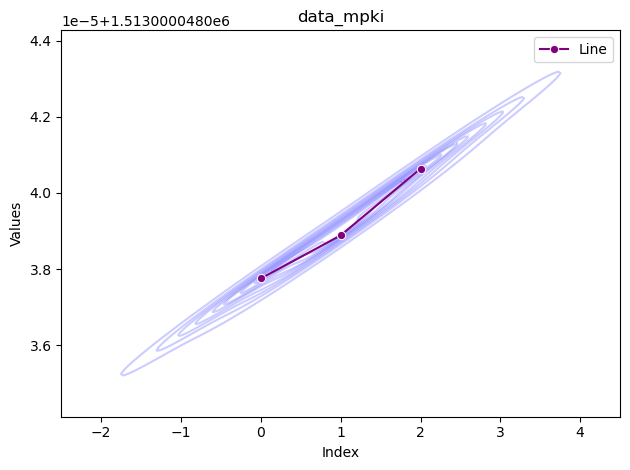

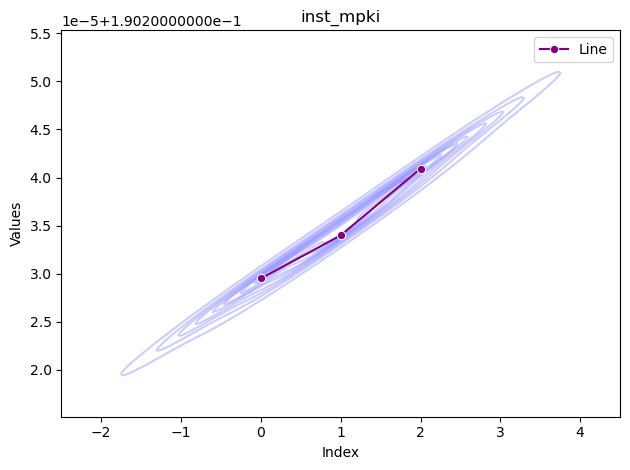

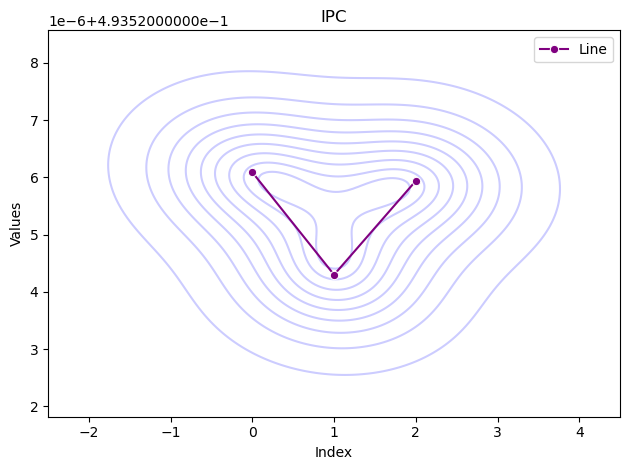

In [726]:
# most important graphs are here regarding those new variables. 

import matplotlib.pyplot as plt
import seaborn as sns


# i think kde plots are cool for showing concentrations but idk how they'll be at the moment. 

columns = ['data_mpki', 'inst_mpki', 'IPC']
for column in columns:
    plt.figure()  
    sns.kdeplot(x=df.index, y=df[column], color='blue', label = 'Barplot', alpha=0.2)
    sns.lineplot(x=df.index, y=df[column], marker='o', color = 'purple', label = 'Line')
    plt.title(column)  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.tight_layout()
    plt.show()  


0.0
5163448788.666667
252985537.04144472


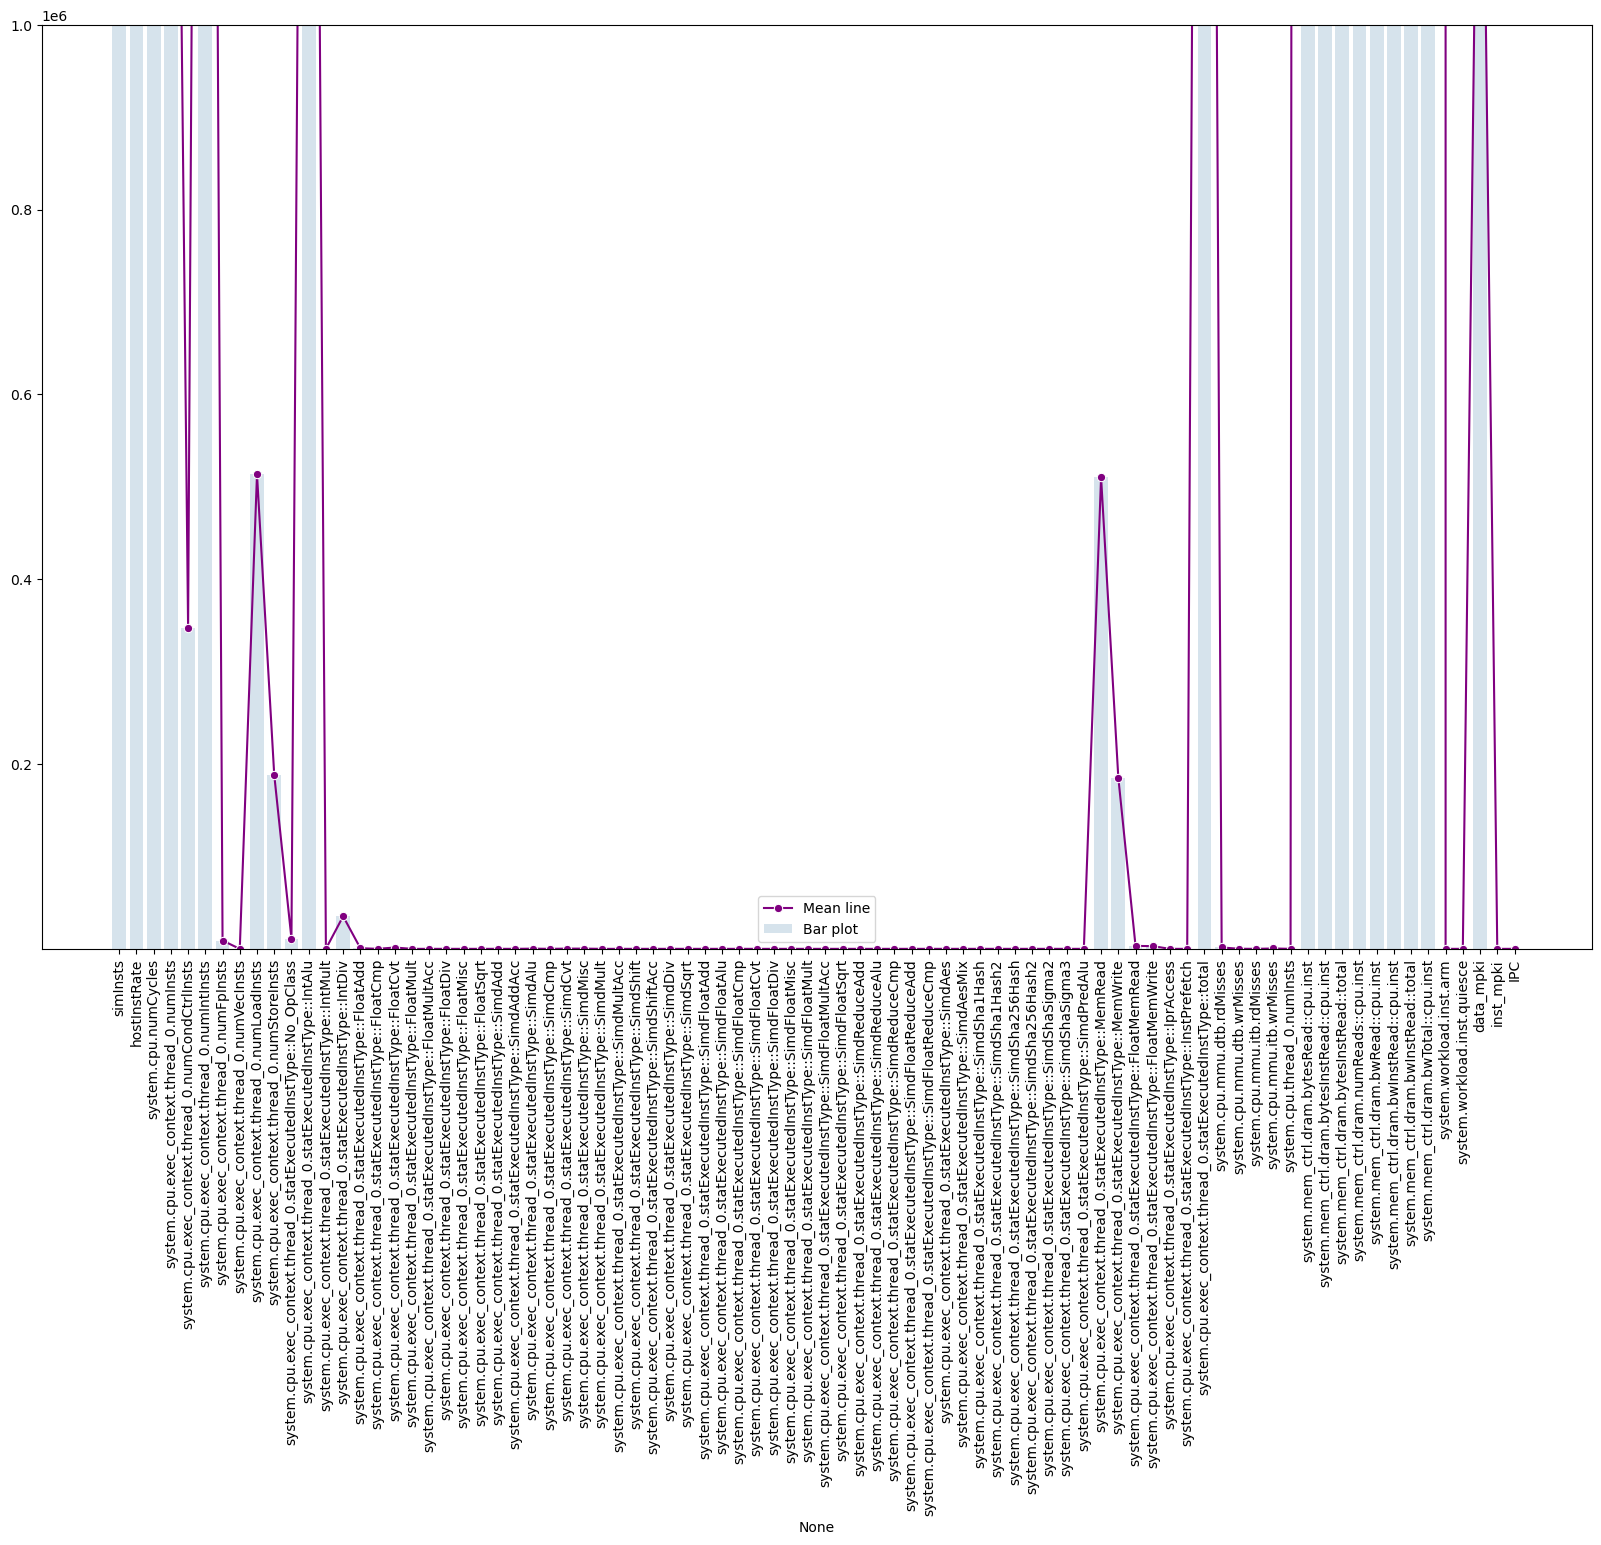

In [727]:
# before looking at the graph for each simulation, average each of the instructions and then make a large kdeplot/bar plot 
# with everything so we can see where most of the instructions or runtime is correlated. I'll add this later tonight 
# or sometime tomorrow once I put more simulations in here. - Rayan 

# once again bar plots are not the way considering just how big the data is 
import numpy as np 

mean_values = df.mean()
print(mean_values.min())
print(mean_values.max())
print(mean_values.mean())


p75 = mean_values.quantile(0.75)
ylim = (1, 10**np.ceil(np.log10(p75)))



# mean_values_filtered = [value for value in mean_values.values if value != 0]
plt.figure(figsize=(20,12))
sns.barplot(x=mean_values.index, y=mean_values.values, alpha=0.2, label='Bar plot')
sns.lineplot(x=mean_values.index, y=mean_values.values, marker='o', color='purple', label='Mean line')
# plt.ylim(0,0.1e5)
# plt.ylim(0,1e2)
plt.ylim(ylim)
_ = plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x1f8f98a6e50>,
 [Text(-0.84287174331677, 0.7068006963197965, 'simInsts'),
  Text(-0.8432344155477588, 0.7063679780651371, 'hostInstRate'),
  Text(-0.8438252016320897, 0.7056621210540943, 'system.cpu.numCycles'),
  Text(-0.8444980195510362, 0.7048567904009848, 'system.cpu.exec_context.thread_0.numInsts'),
  Text(-0.8447572632503383, 0.7045460710172181, 'system.cpu.exec_context.thread_0.numCondCtrlInsts'),
  Text(-0.8451727659011778, 0.7040475806214755, 'system.cpu.exec_context.thread_0.numIntInsts'),
  Text(-0.8455519021344333, 0.7035921977941783, 'system.cpu.exec_context.thread_0.numFpInsts'),
  Text(-0.8455528618468701, 0.7035910444445466, 'system.cpu.exec_context.thread_0.numVecInsts'),
  Text(-0.8456075878247534, 0.7035252713394183, 'system.cpu.exec_context.thread_0.numLoadInsts'),
  Text(-0.8456823742869101, 0.7034353714595639, 'system.cpu.exec_context.thread_0.numStoreInsts'),
  Text(-0.8457036228277343, 0.7034098253053092, 'system.cpu.exec_context.

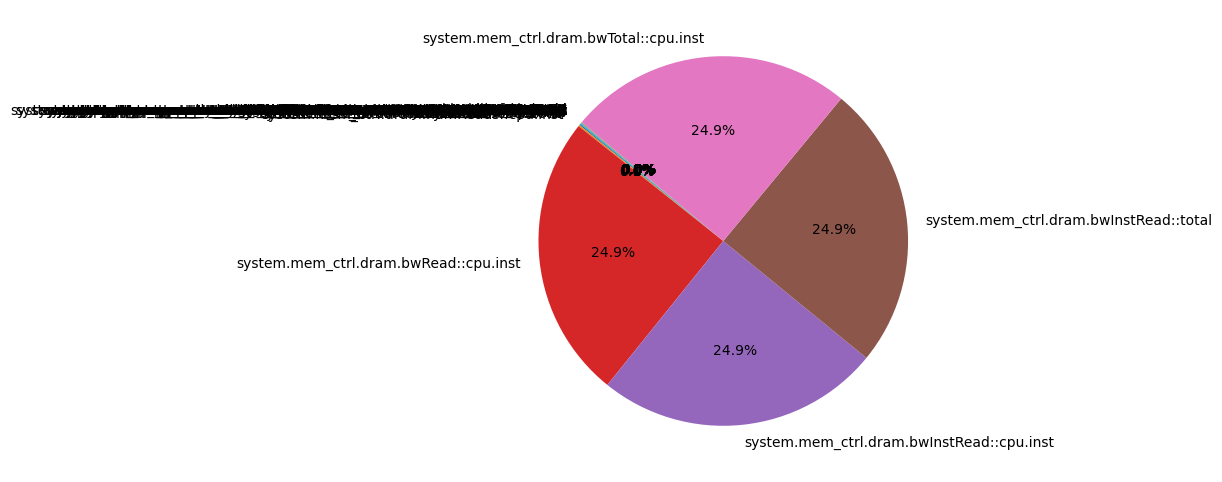

In [728]:
# just a quick and dirty pie chart to get an idea of the highest values right now 

mean_values = df.mean()

plt.figure(figsize=(10,6))

plt.pie(mean_values, labels=mean_values.index, autopct='%1.1f%%', startangle=140)

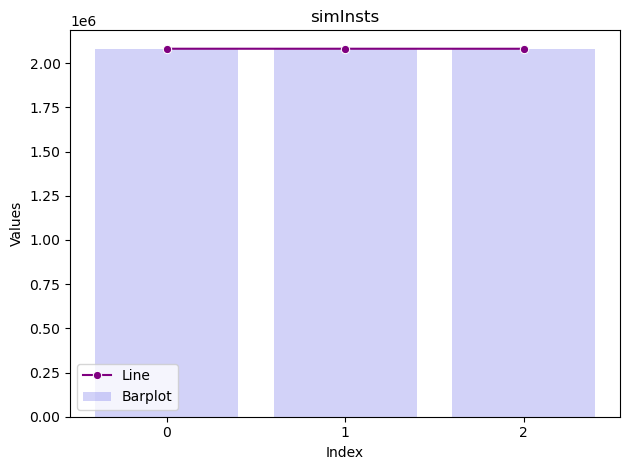

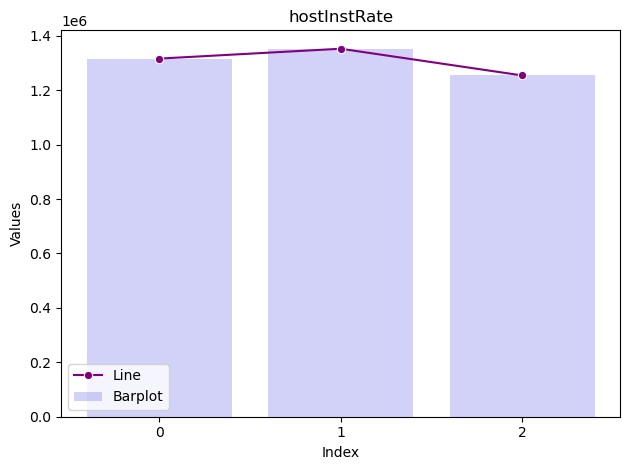

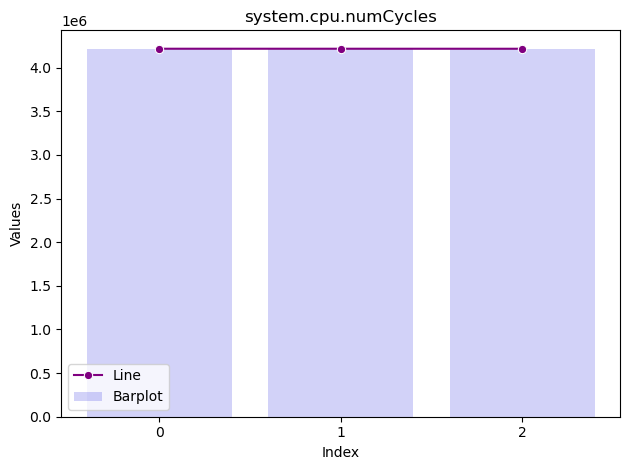

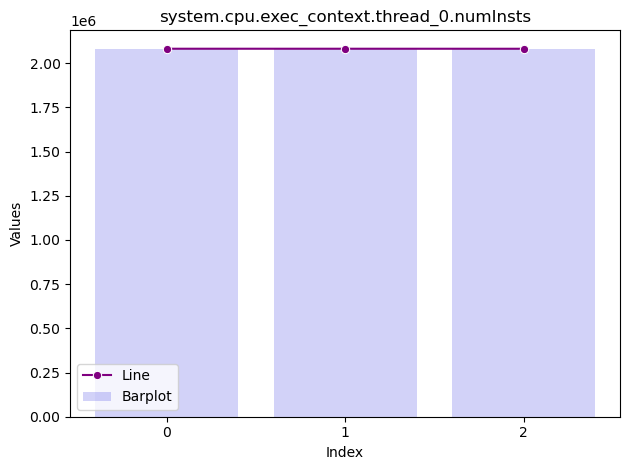

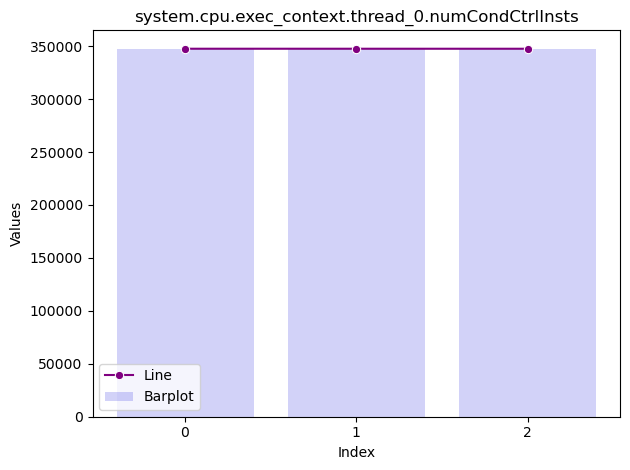

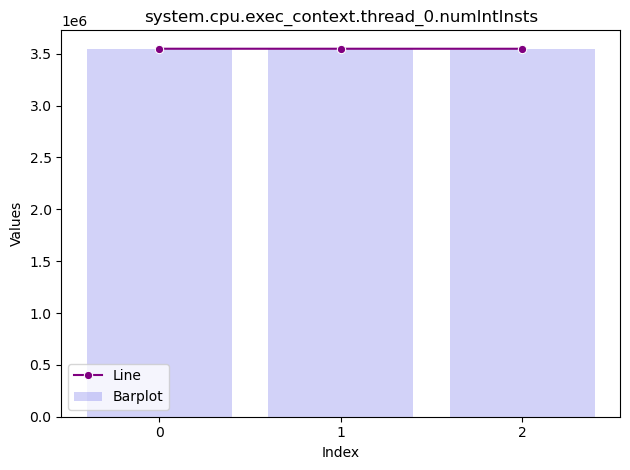

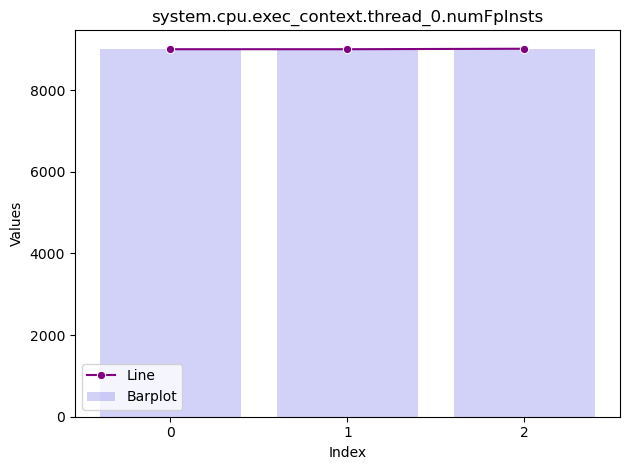

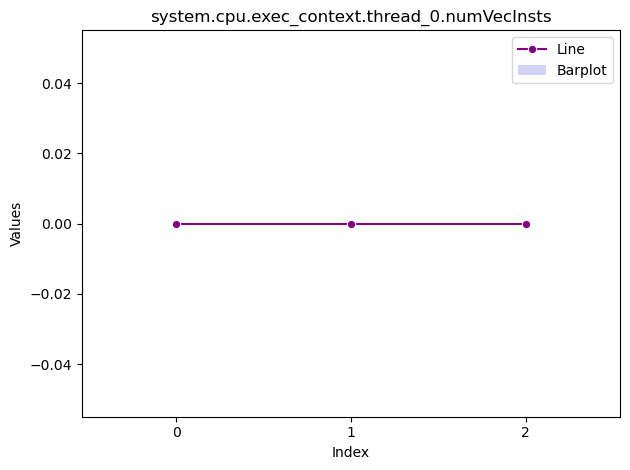

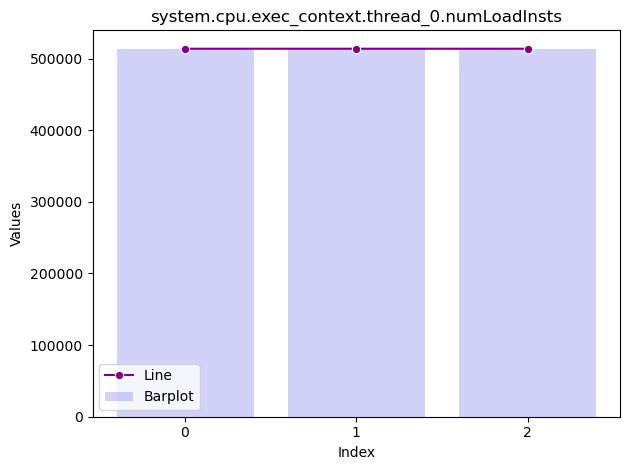

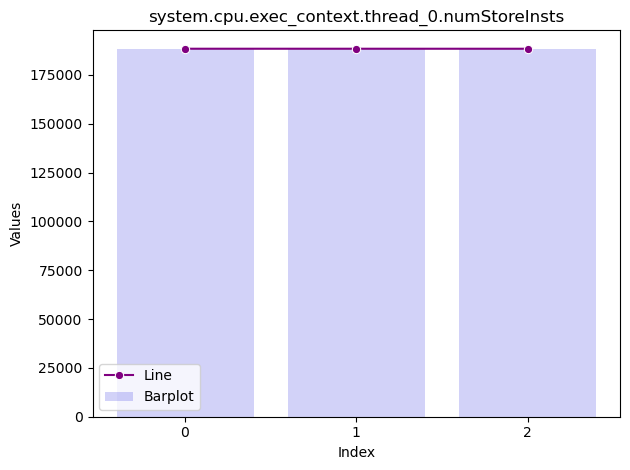

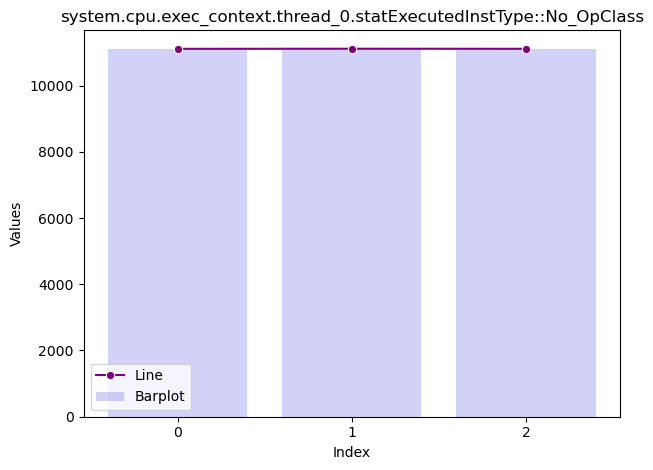

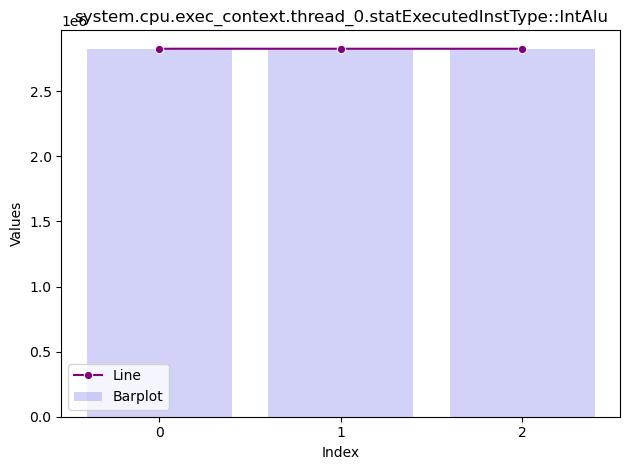

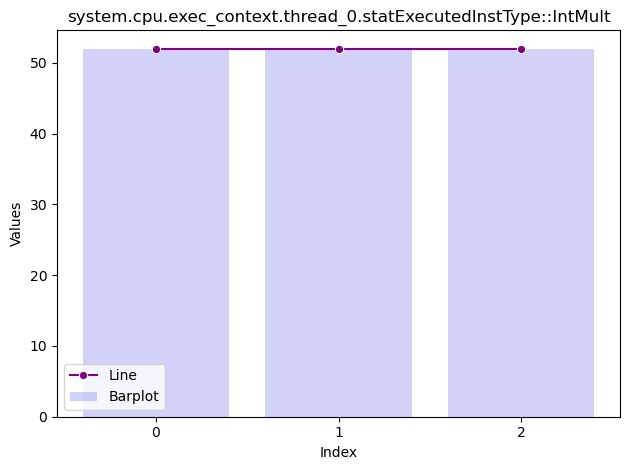

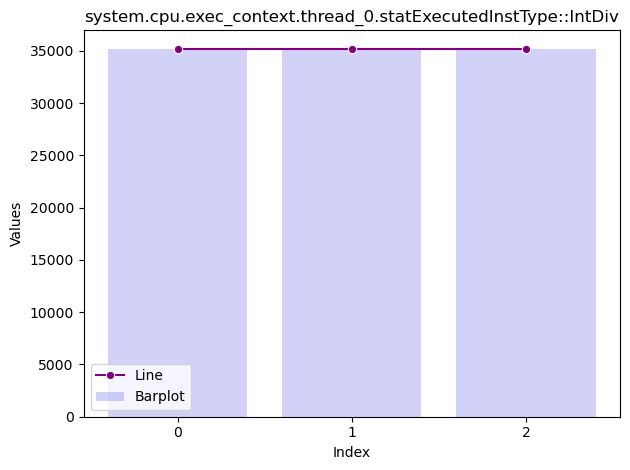

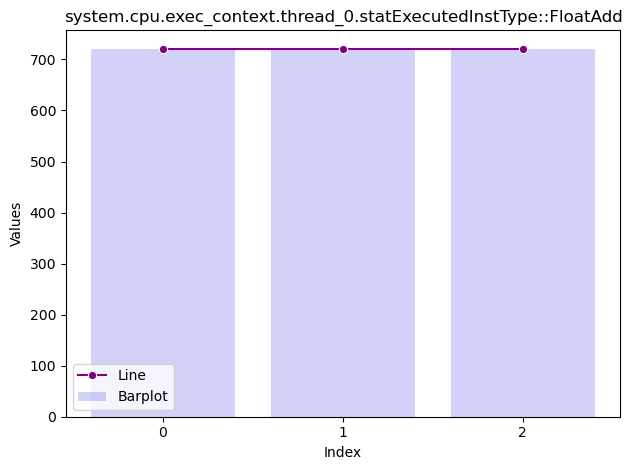

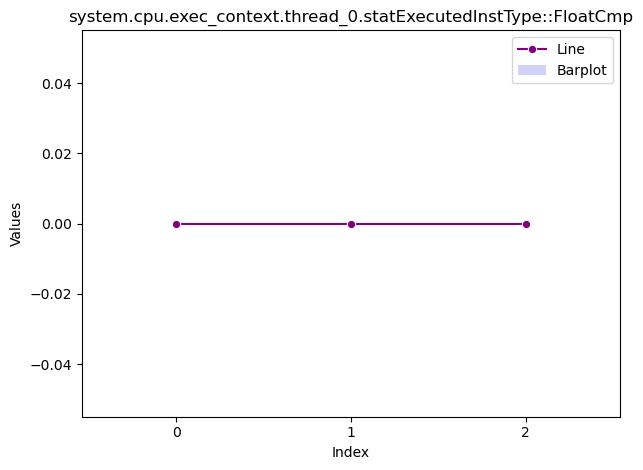

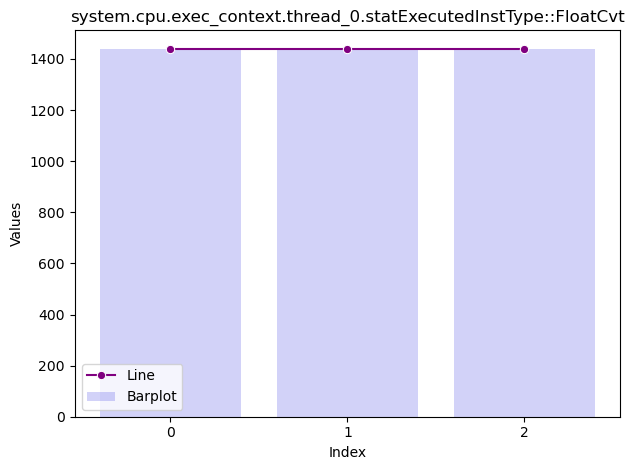

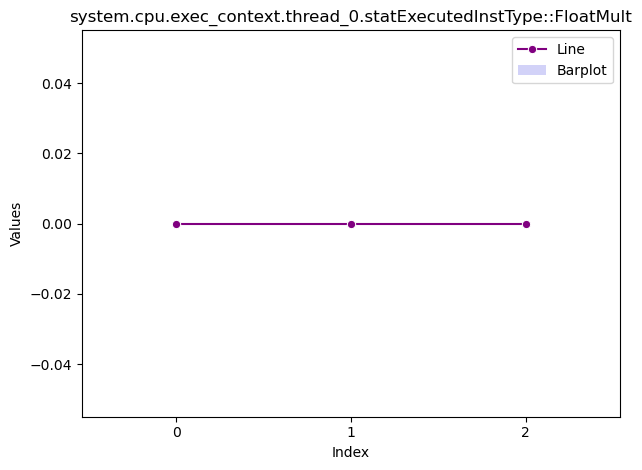

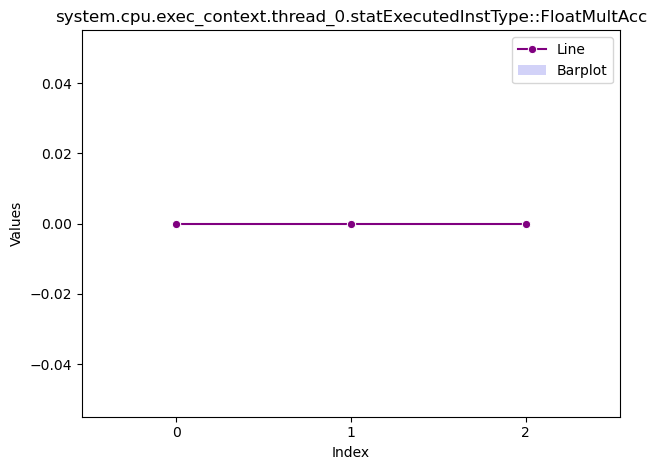

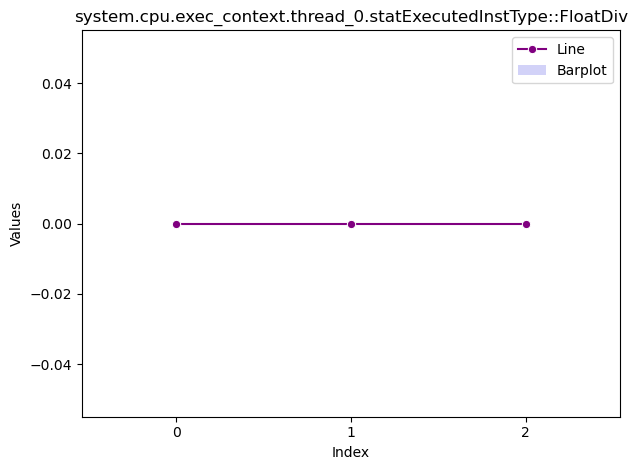

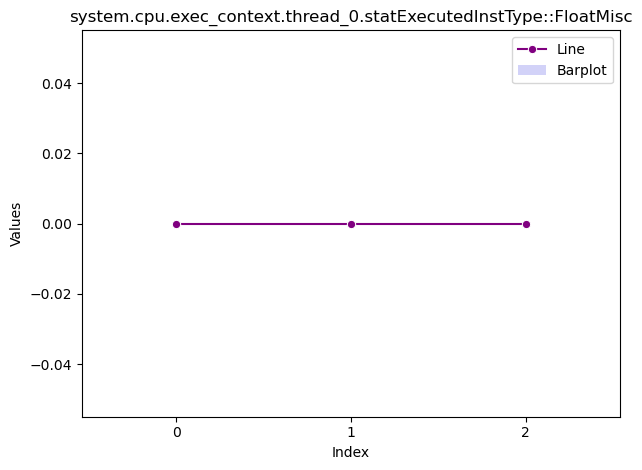

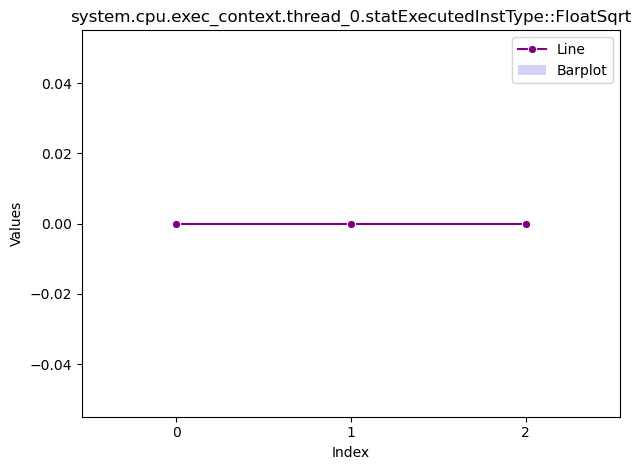

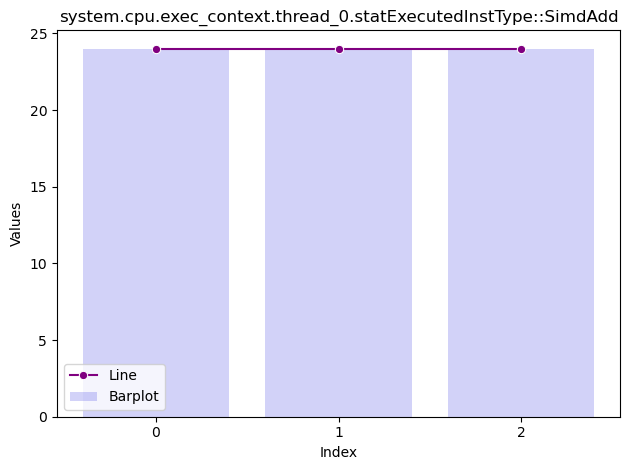

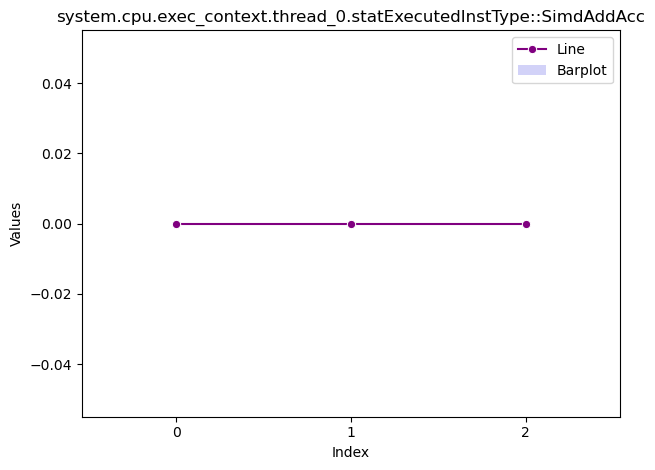

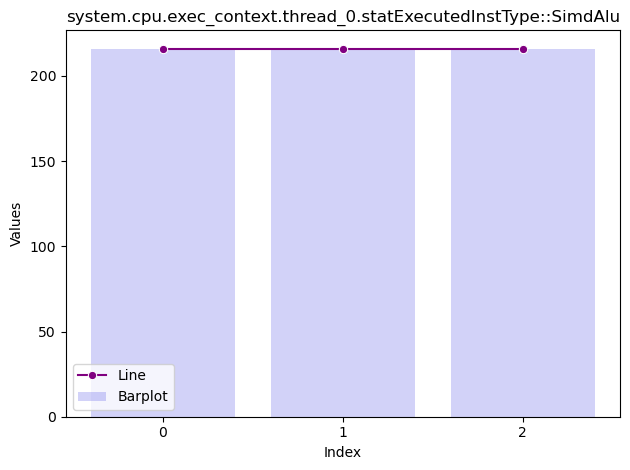

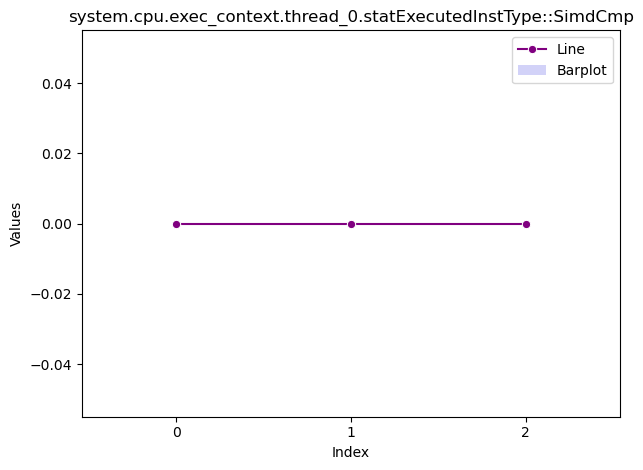

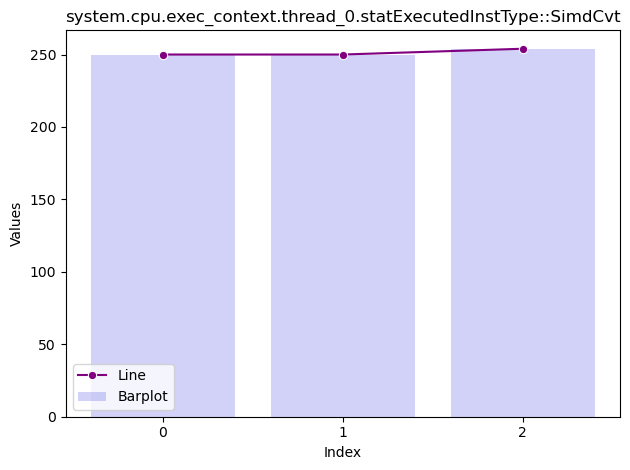

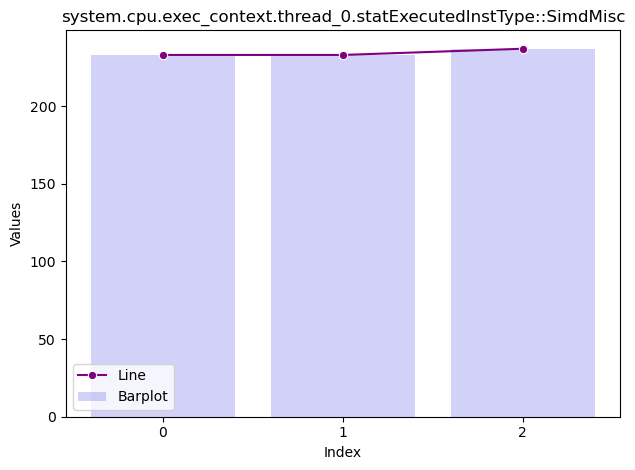

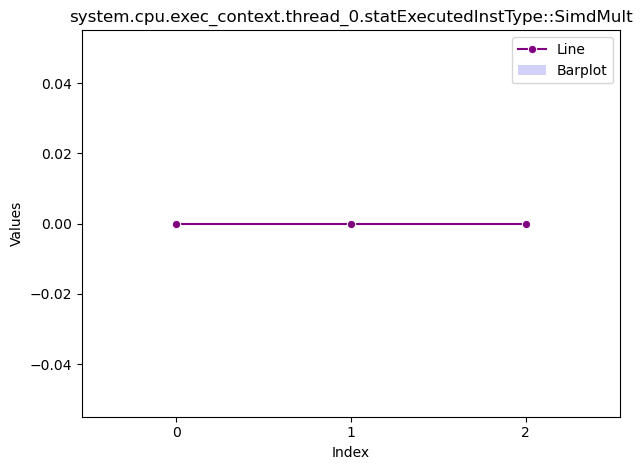

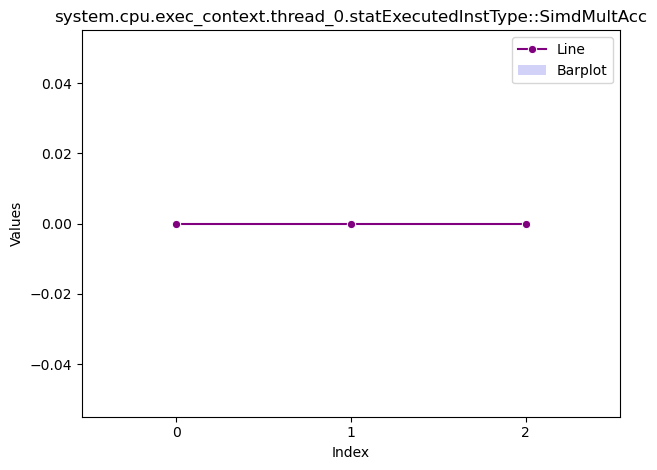

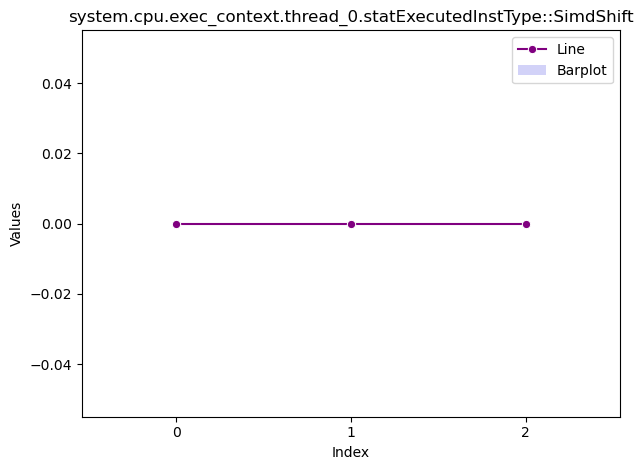

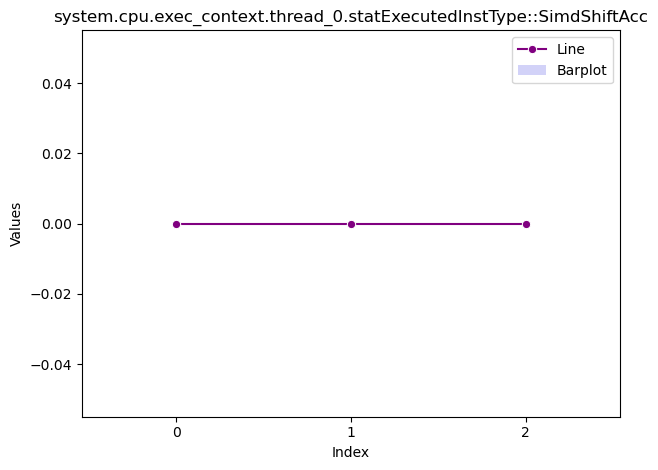

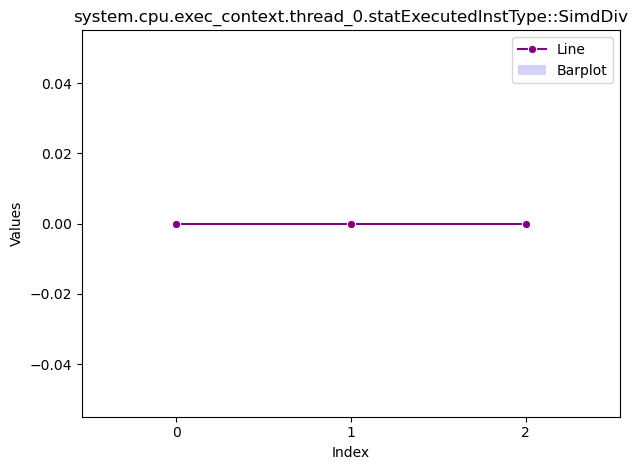

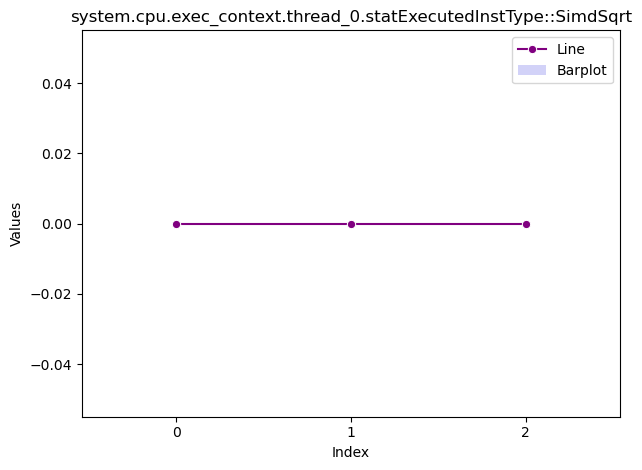

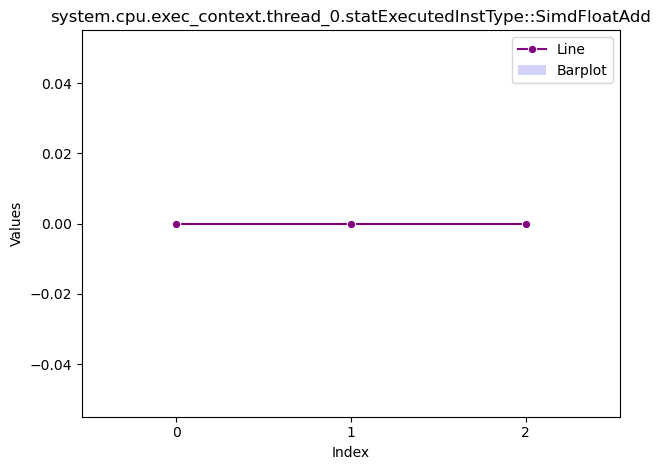

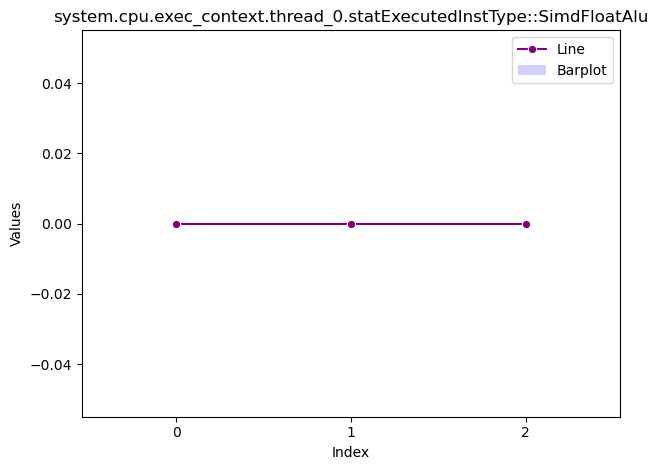

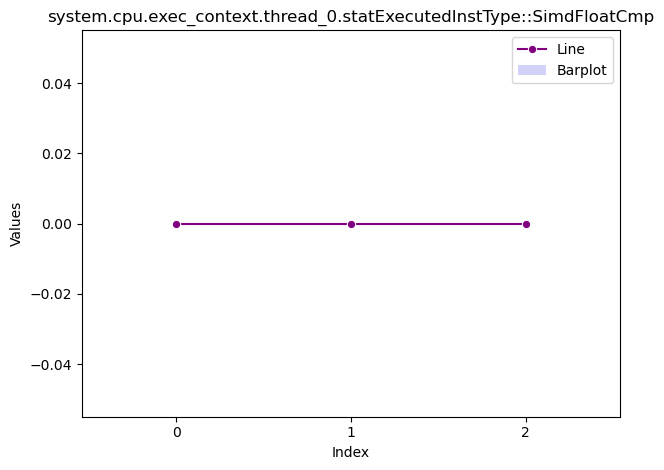

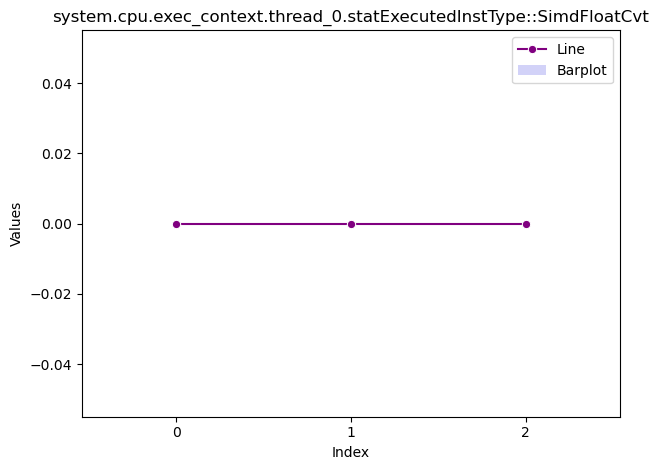

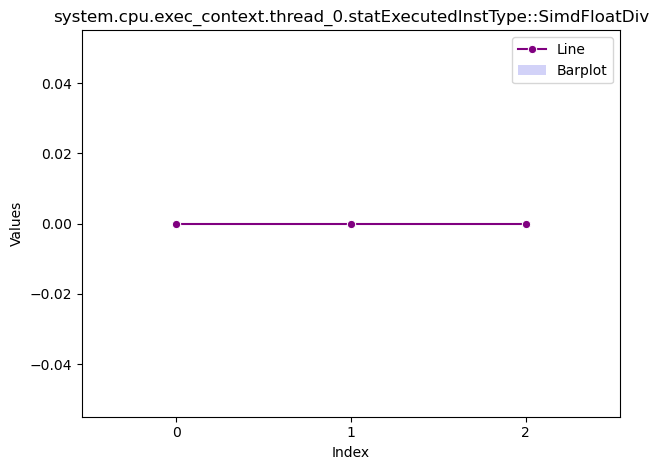

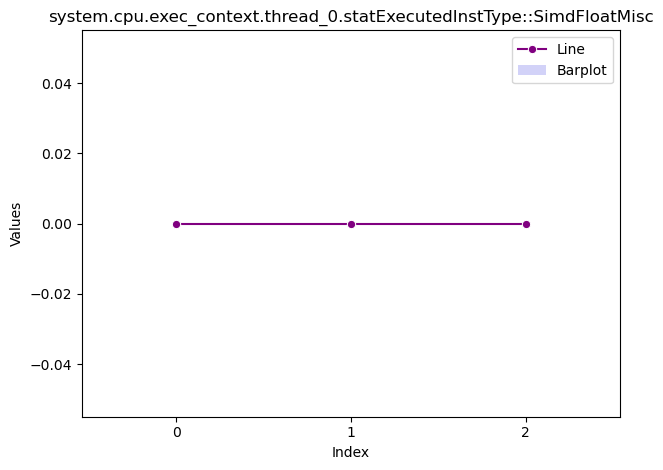

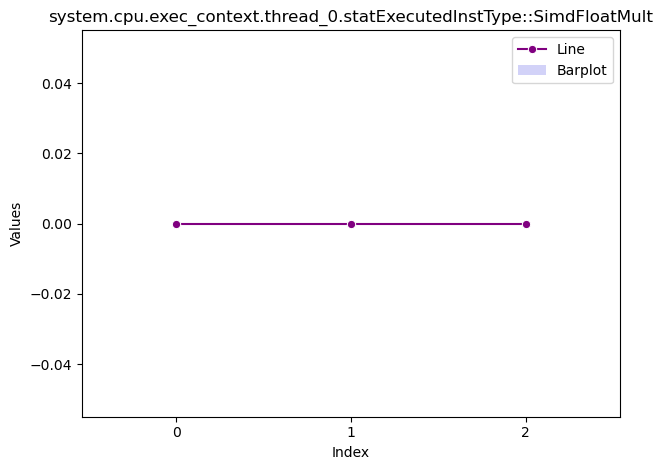

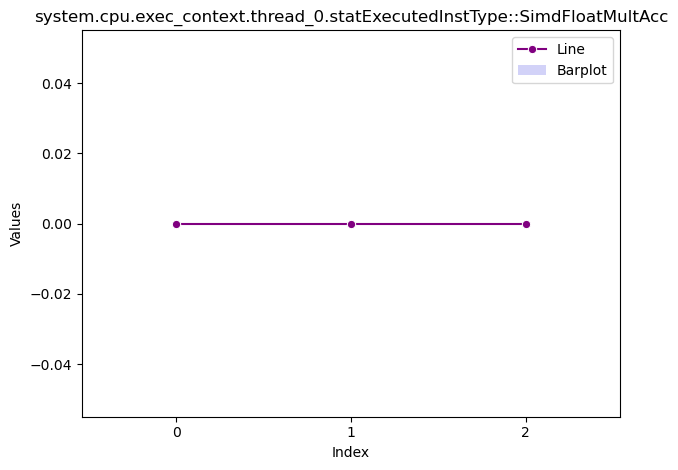

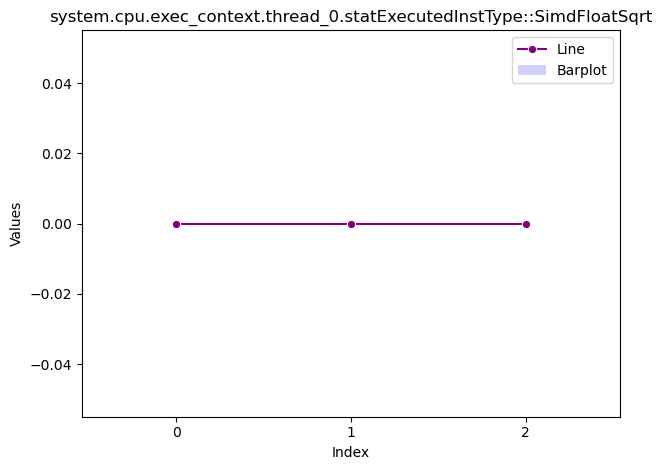

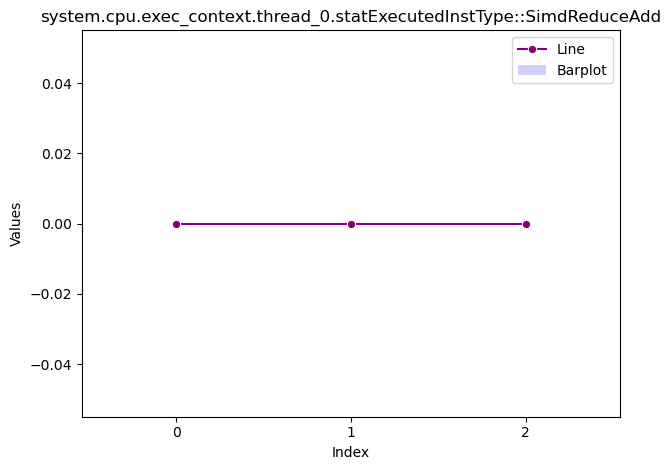

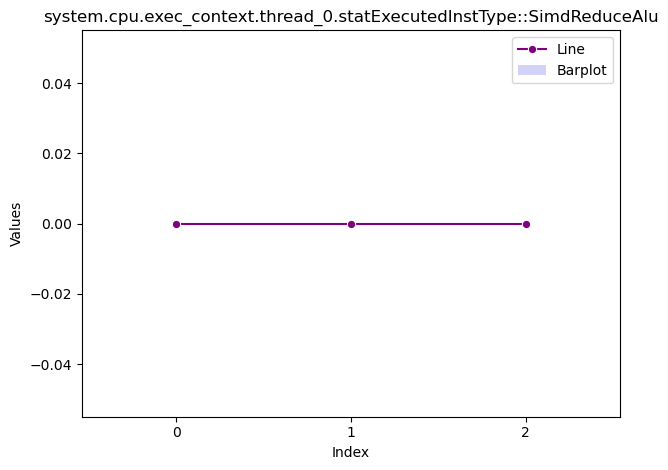

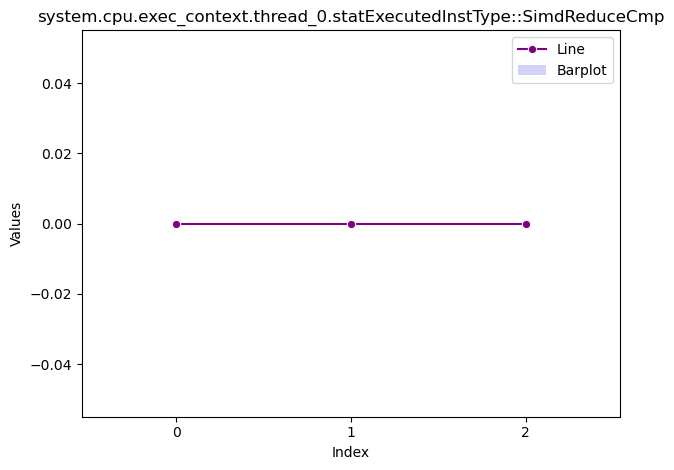

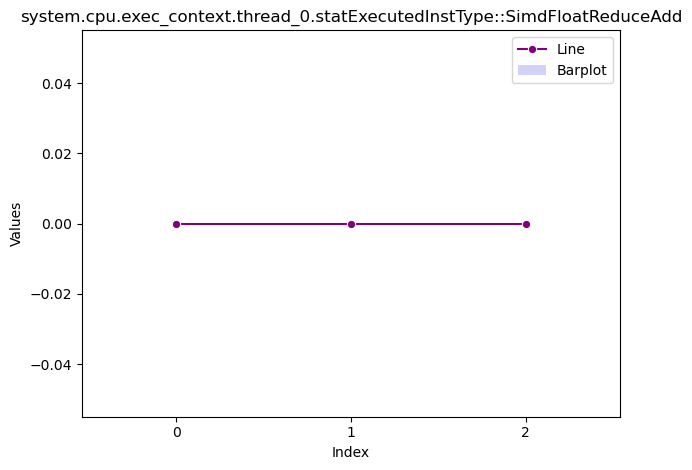

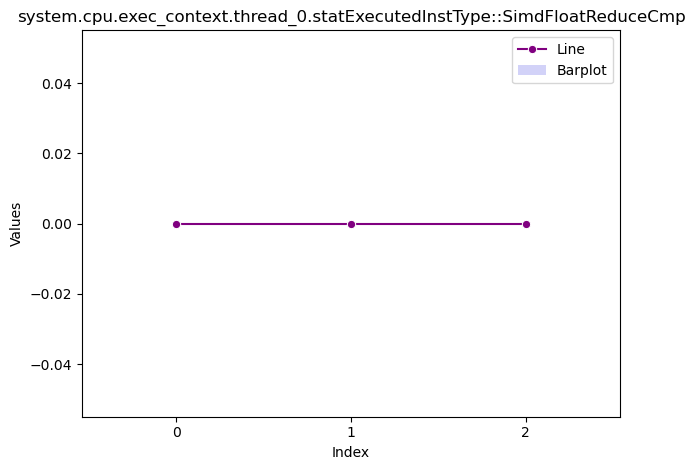

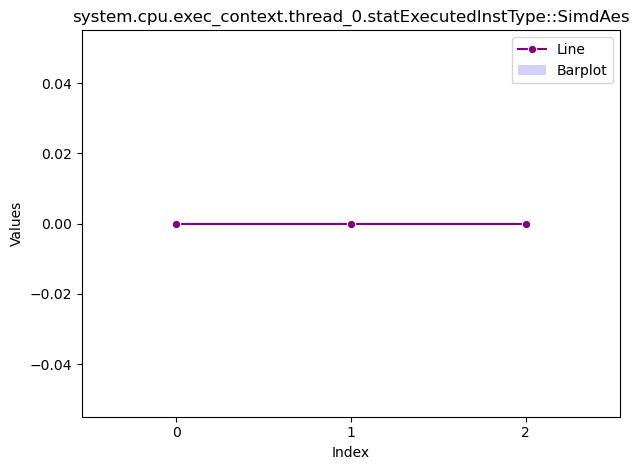

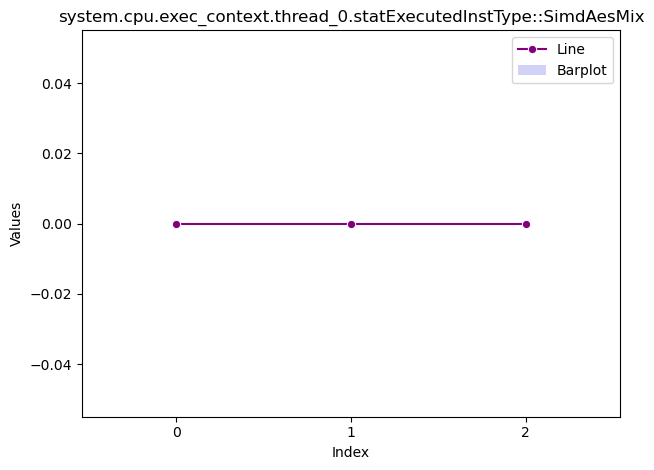

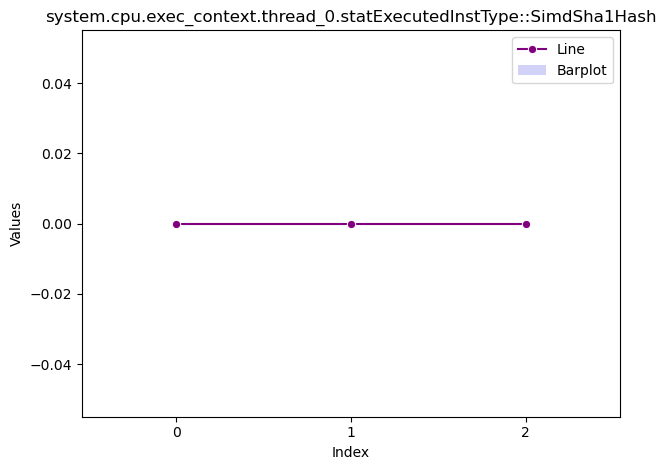

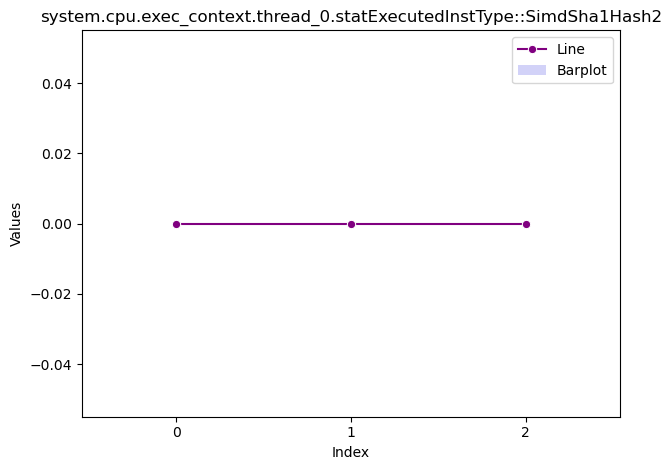

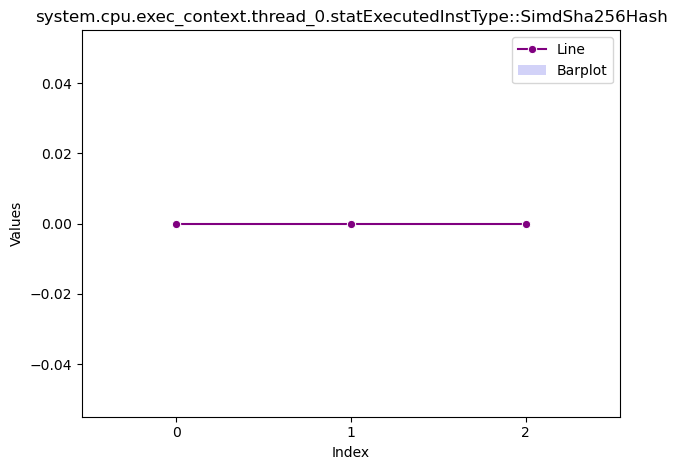

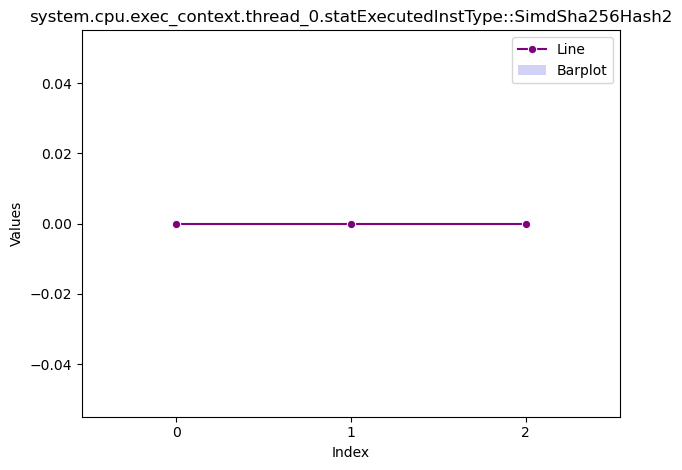

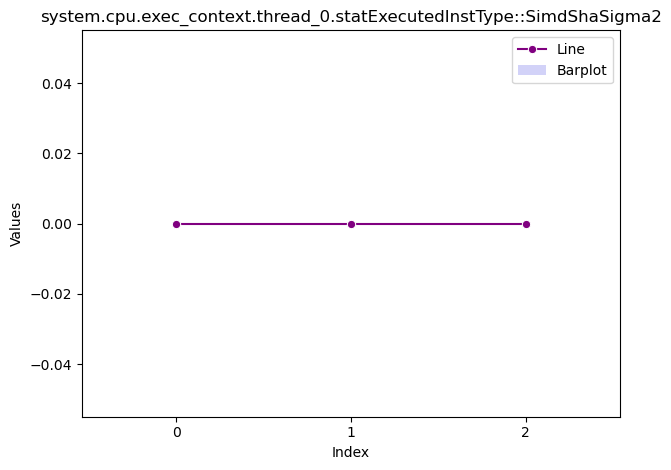

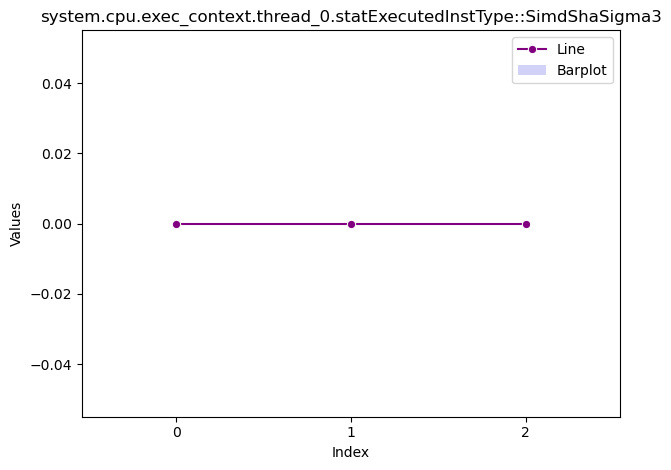

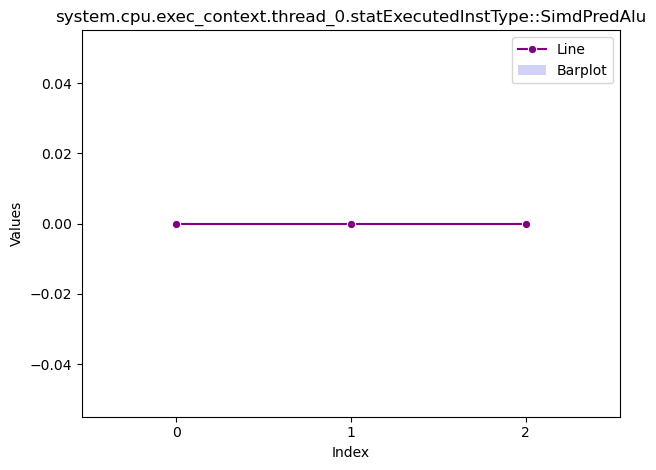

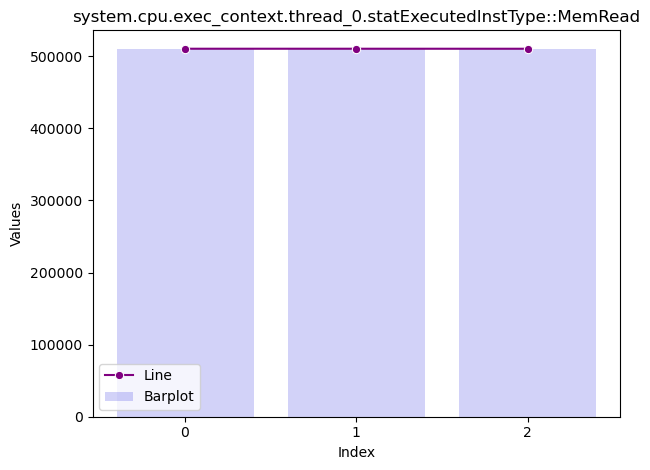

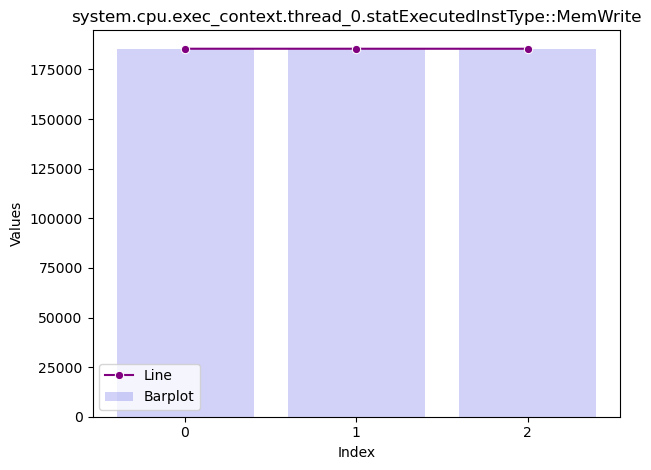

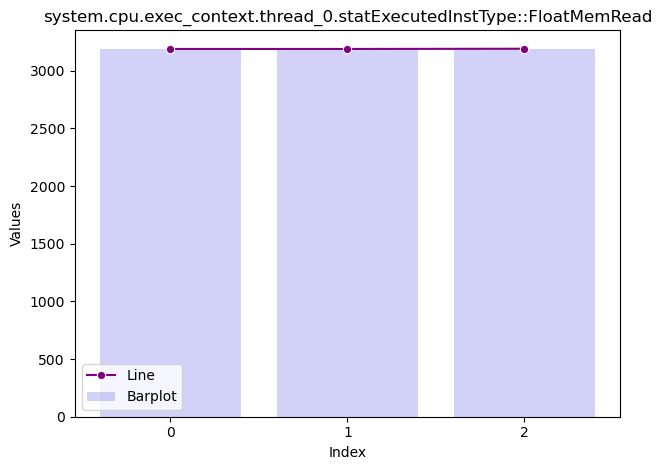

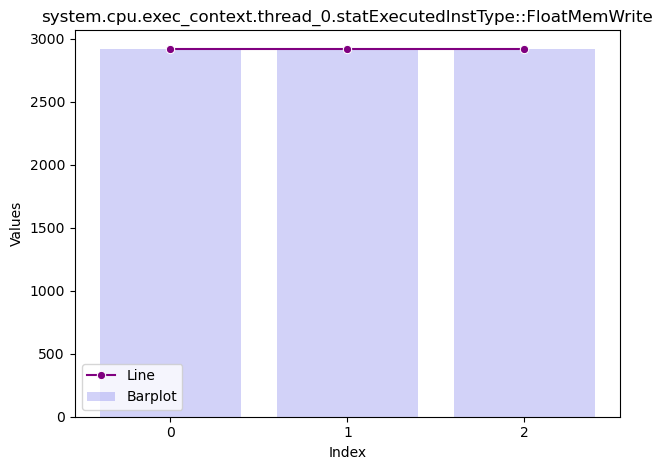

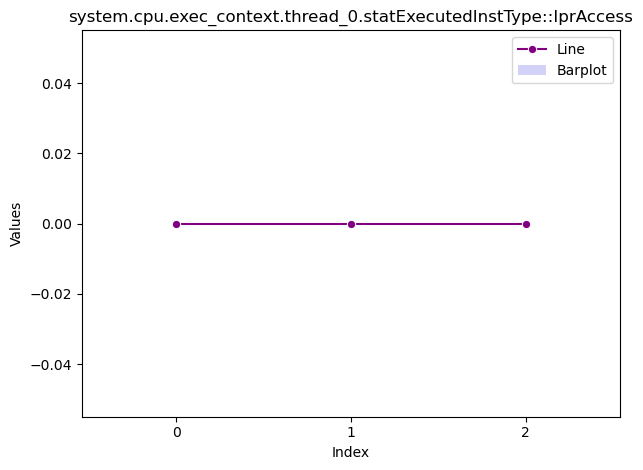

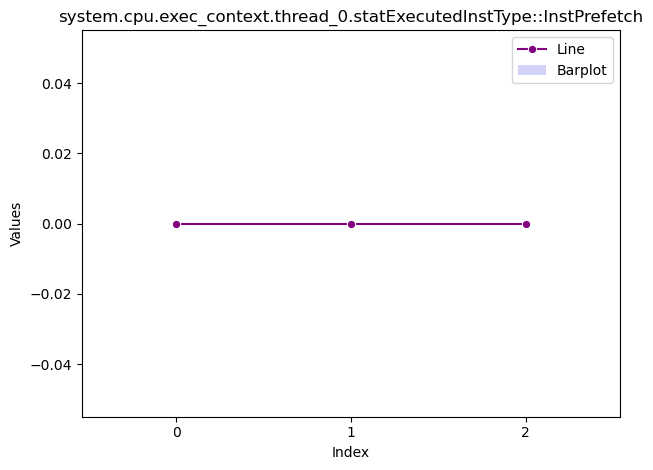

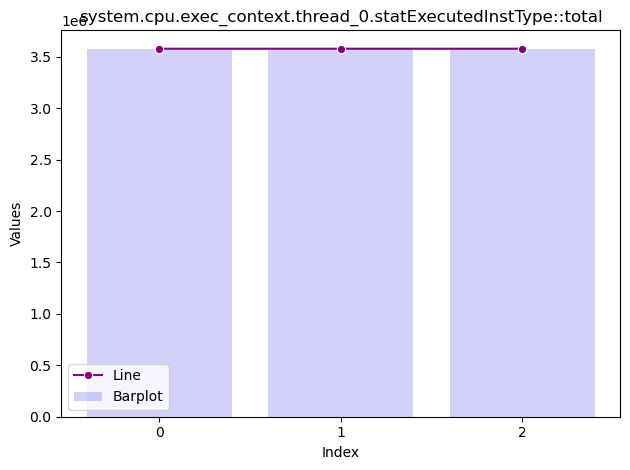

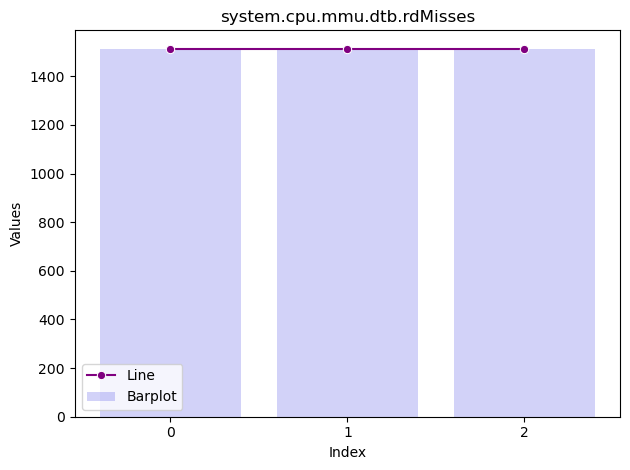

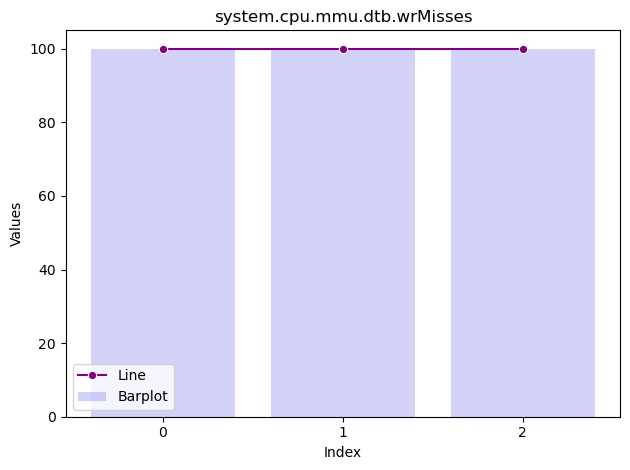

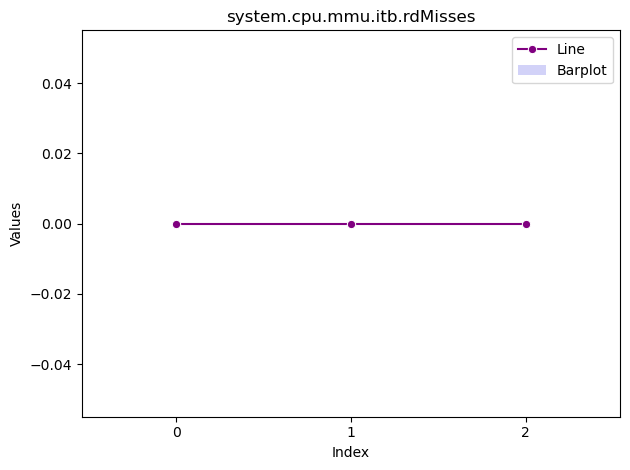

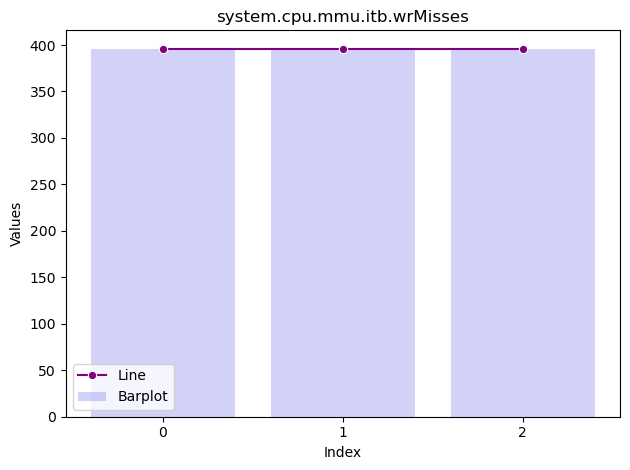

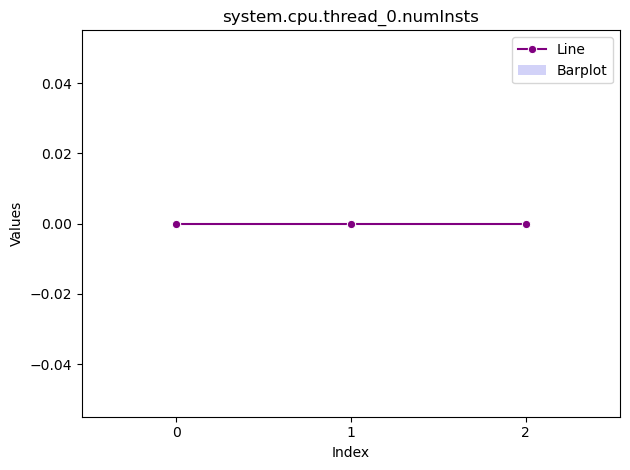

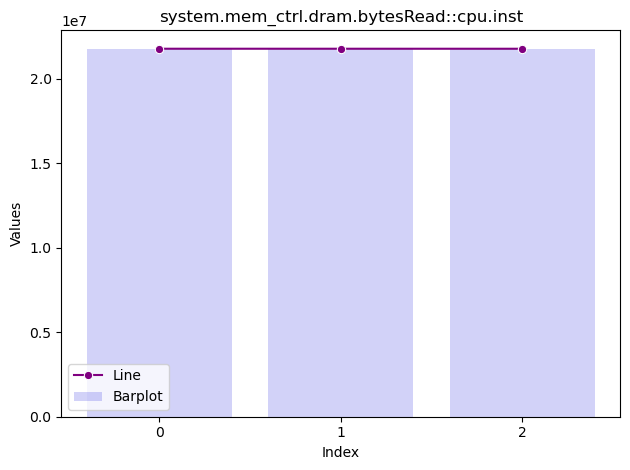

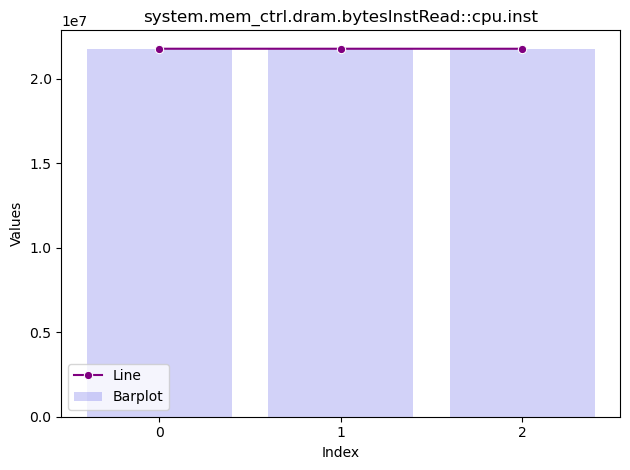

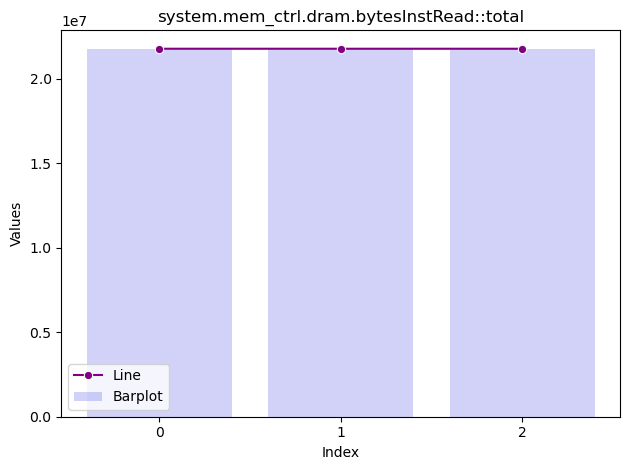

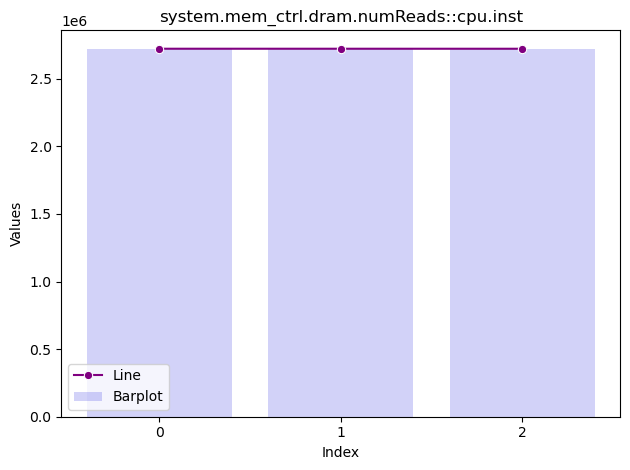

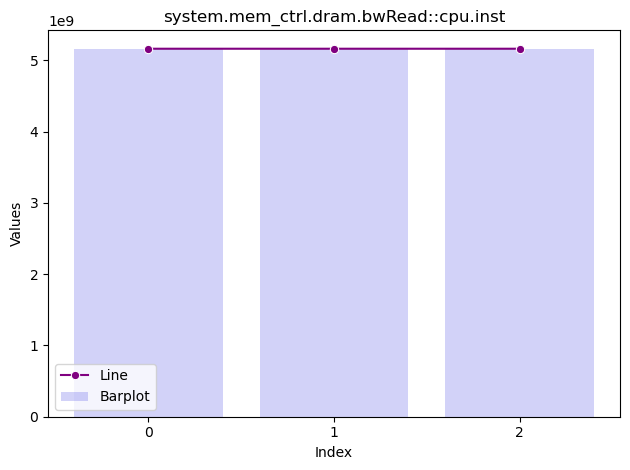

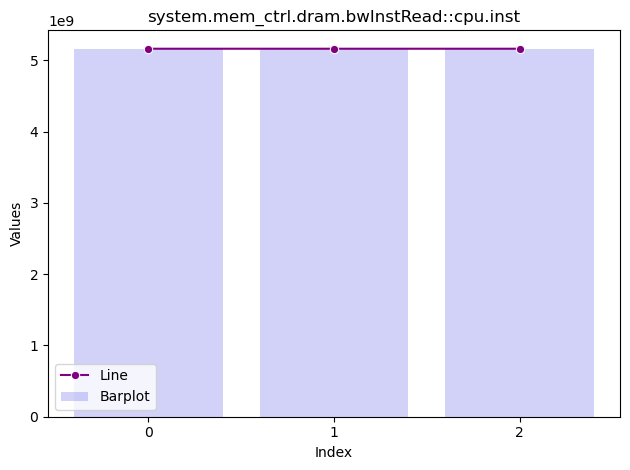

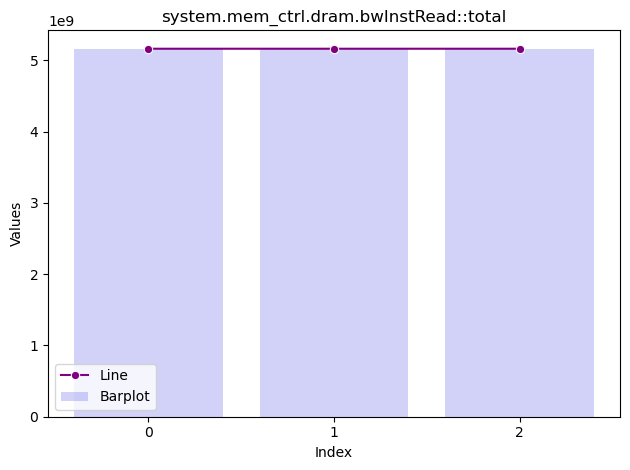

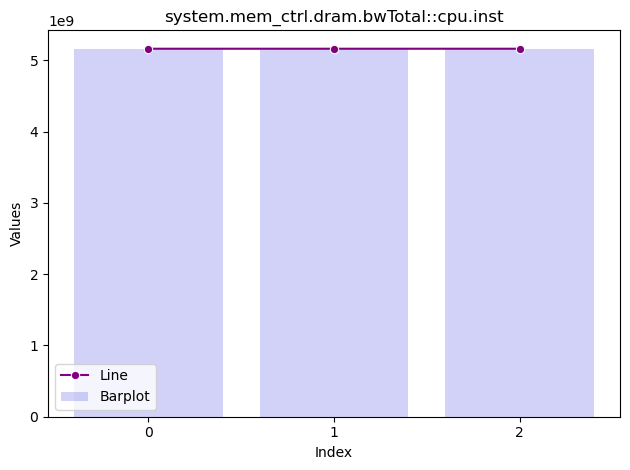

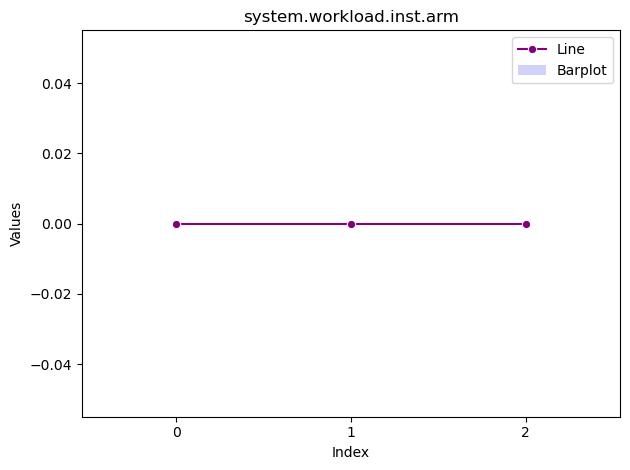

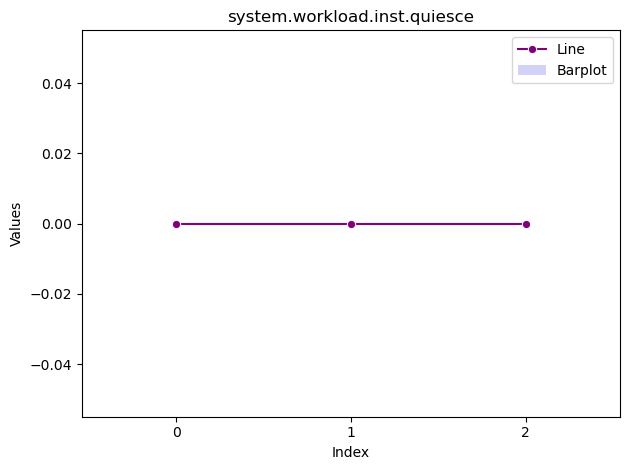

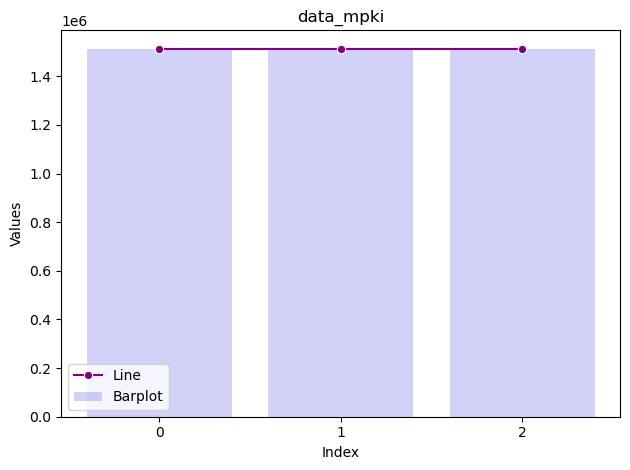

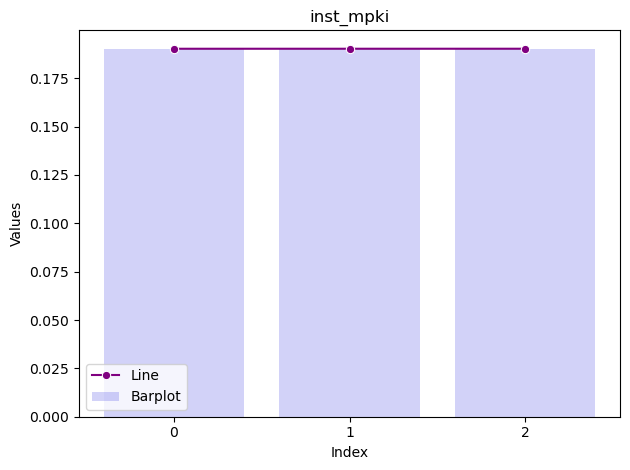

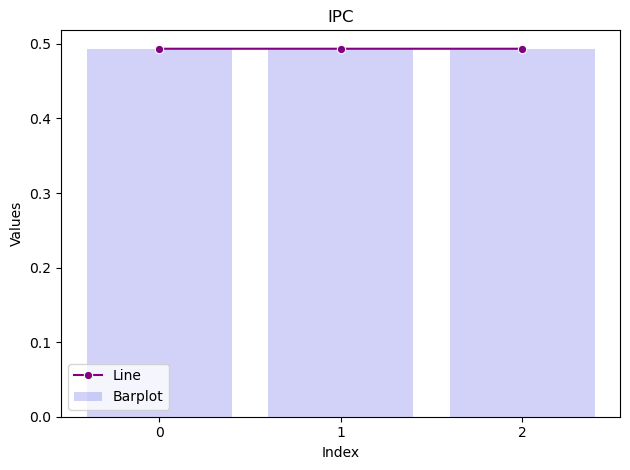

In [729]:
# make tighter layout to avoid having super long page

# these are the remaining columns just to have them laid out.  

for column in df.columns:
    plt.figure()  
    sns.barplot(x=df.index, y=df[column], color='blue', label = 'Barplot', alpha=0.2)
    sns.lineplot(x=df.index, y=df[column], marker='o', color = 'purple', label = 'Line')
    plt.title(column)  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.tight_layout()
    plt.show()  